In [462]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

from trading_session_gym.envs.trading_session_gym import TradingSession
from baseline_policy import BaselinePolicy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [463]:
mode = 'human'
env = TradingSession()
env.reset()
done = False

policy = BaselinePolicy(mode = 'random',
                        constant_order = 0.08/100,
                        boundary = env.get_boundary())

rewards = np.array(env.get_reward())
prices = np.array(env.get_prices())
holdings_quantity = np.array(env.get_holdings_quantity())

while done == False:
    action = policy.select_action(env)
    obs, reward, done, _ = env.step(action)
    env.render(mode=mode)
    rewards = np.append(rewards, reward)
    prices = np.vstack([prices, env.get_prices()])
    holdings_quantity = np.vstack([holdings_quantity, env.get_holdings_quantity()])

c:\123\thesis\trading-session-gym\venv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


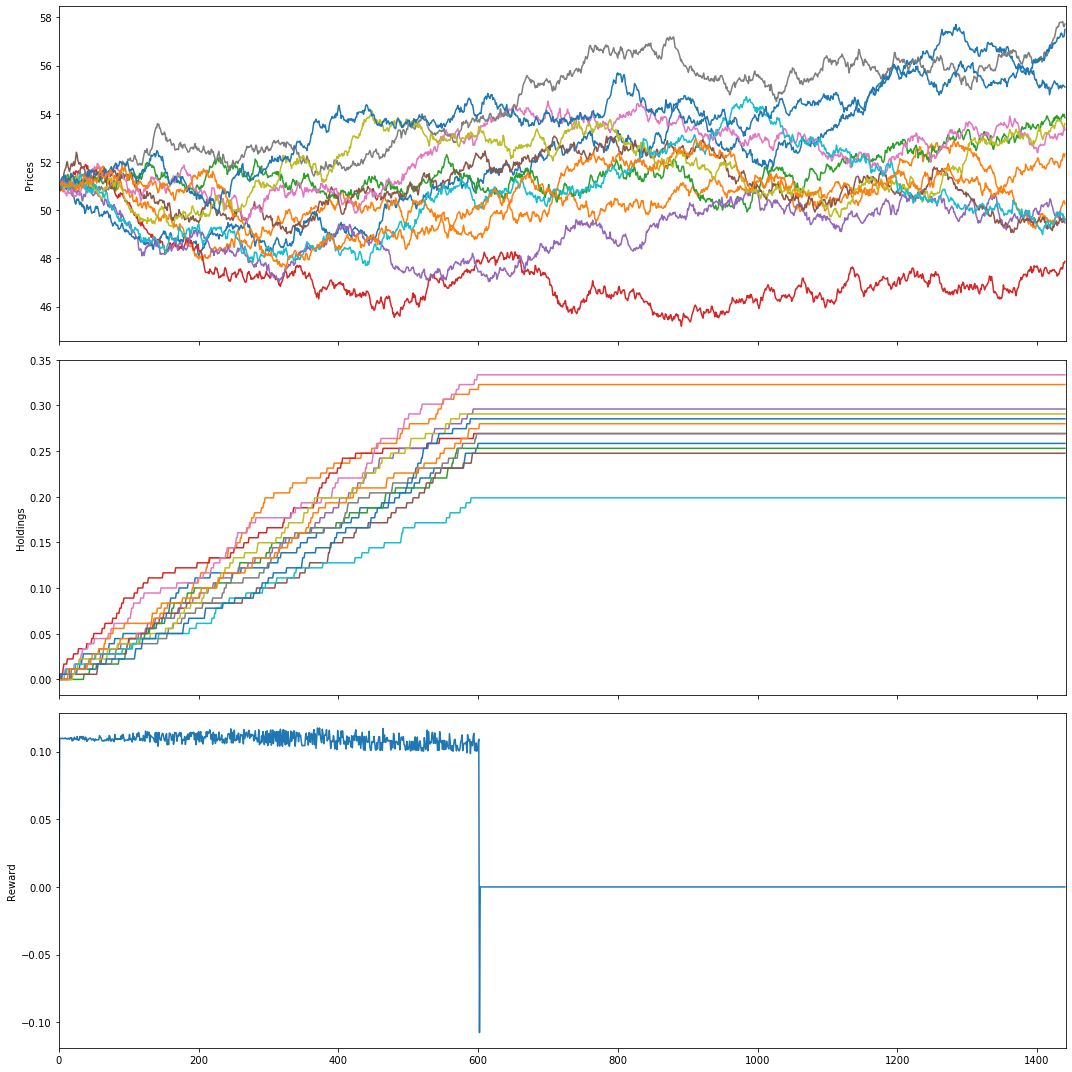

In [464]:
fig, axs = plt.subplots(3, figsize = [15,15], sharex = True)

axs[0].plot(prices)
axs[0].set_ylabel('Prices')

axs[1].plot(holdings_quantity)
axs[1].set_ylabel('Holdings')

axs[2].plot(rewards)
axs[2].set_ylabel('Reward')

axs[0].set_xlim([0, len(prices)])
plt.tight_layout()

In [465]:
optimal_strategy_reward = 1000*env.get_boundary()/(np.min(prices))
naive_strategy_reward = np.add.accumulate(rewards)[-1]
naive_performance = naive_strategy_reward/optimal_strategy_reward

print("Naive performance: {}%". format(round(100*naive_performance, 2)))

Naive performance: 89.45%


In [466]:
optimal_strategy_reward

73.02455378575982

In [467]:
naive_strategy_reward

65.32081695922268

In [468]:
np.min(prices)

45.190279555580354